In [1]:
import scipy.optimize as opt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Реализация в ручную

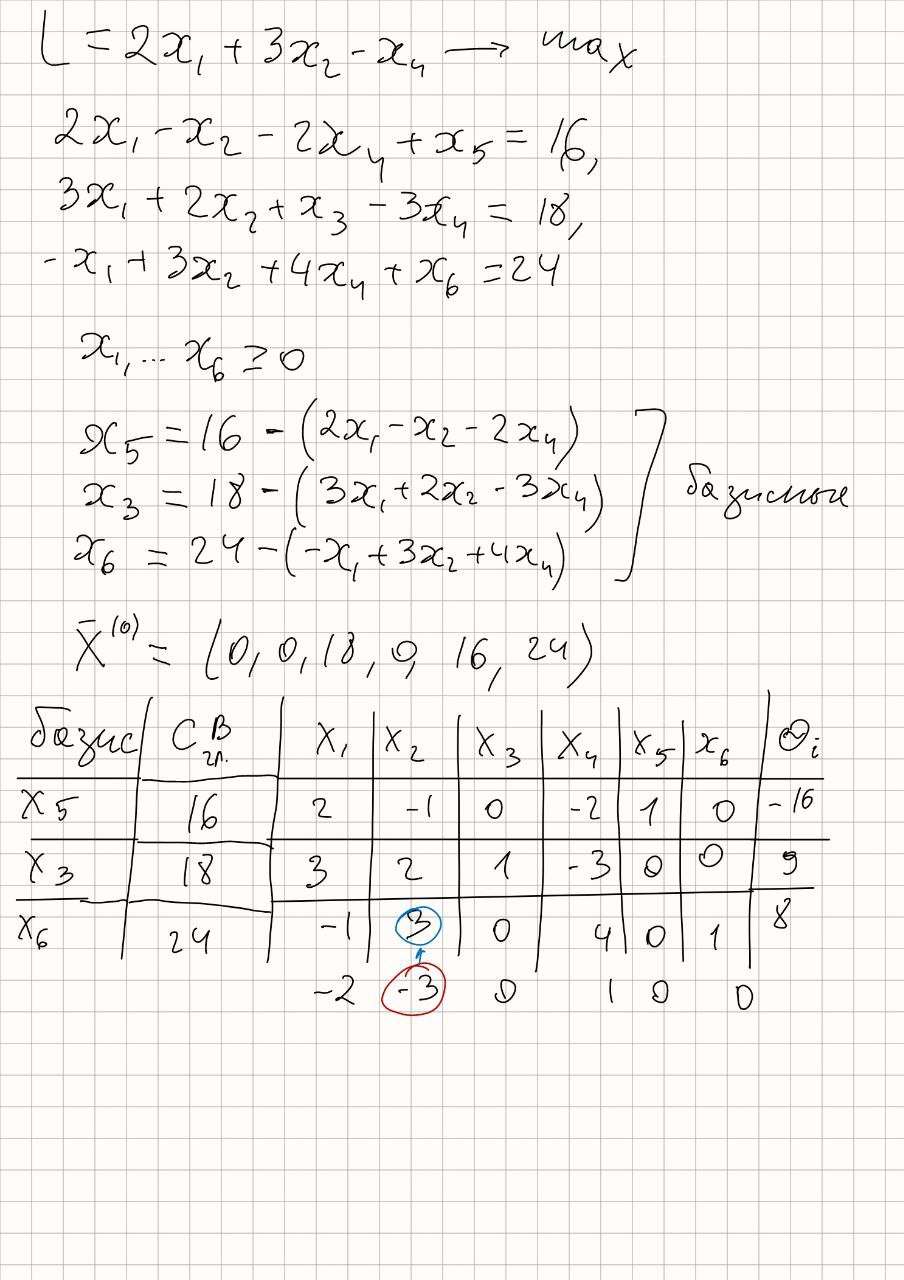

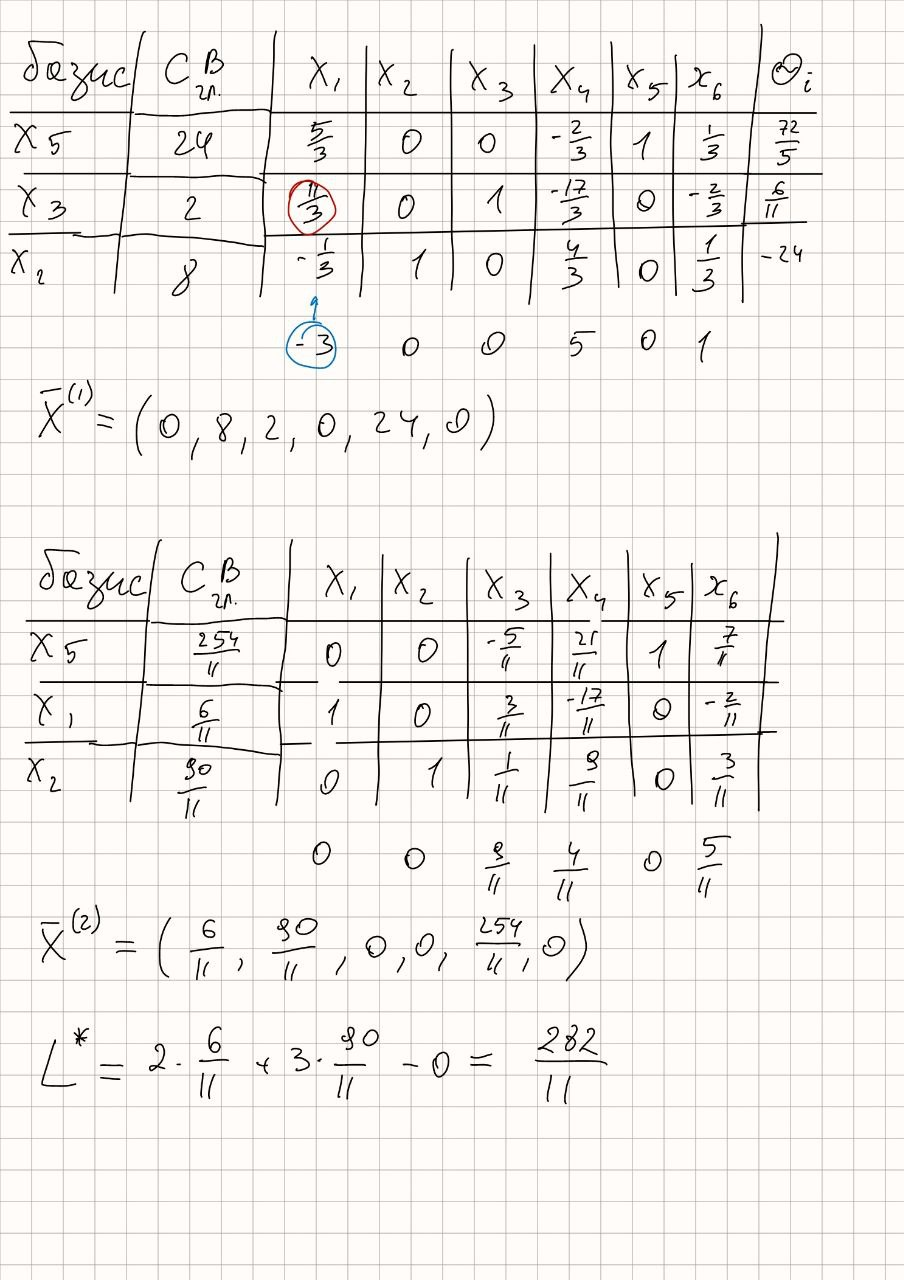

### Реализация с помощью scipy.optimize

In [332]:
c = np.array([-2., -3., 1.])
A = np.array([[2, -1, -2],
              [3, 2, -3],
              [-1, 3, 4]])
b = np.array([16,
              18,
              24])

simplex_steps = []
bounds = [(0, None)]*6

In [333]:
res = opt.linprog(c, A_ub=A, b_ub=b, method='revised simplex',
                  callback = lambda xk, **kwargs : simplex_steps.append([xk.copy(), kwargs.copy()])
                  )

In [334]:
res.fun

-25.636363636363637

In [335]:
res.x

array([0.54545455, 8.18181818, 0.        ])

### Собственная реализация

In [336]:
def recalculation(k,A_w,b,out):
    
    k_min_arg = np.argmin(k)
    
    simplex = []
    for i, elem in enumerate(A_w[:, k_min_arg]):
        simplex.append(b[i]/elem)

    minim = 10**8
    arg = 0
    
    for i in range(len(simplex)):
        if(simplex[i]<minim and simplex[i]>0):
            minim = simplex[i]
            arg = i
    a = np.concatenate((b.reshape((-1,1)), A_w), axis=1)
    sim = A_w[arg,k_min_arg]

    a_new = np.zeros_like(a)
    k_new = np.zeros_like(k)
    n = a.shape[0]
    m = a.shape[1]
    k_min_arg+=1
    for i in range(n):
        
        for j in range(m):
            if(j==k_min_arg and i!=arg):
                a_new[i,j] = 0
            if(i==arg):
                a_new[i,j] = a[i,j]/sim

            else:
                # print(f"{a[i,j]} - ({a[arg,j]}*{a[i,k_min_arg]})/{sim}, {k_min_arg}")
                a_new[i,j] = a[i,j] - (a[arg,j]*a[i,k_min_arg])/sim
    
    k_min_arg-=1
    for i in range(len(k_new)):
        k_new[i] = k[i] - (a[arg,i+1]*k[k_min_arg])/sim
    
    A_new = a_new[:, 1:]
    b_new = a_new[:, 0]
   
    return k_new,A_new, b_new, arg

In [341]:
def linprog(c, A, b):
    I = np.eye(A.shape[0])
    A_w = np.concatenate((A,I), axis=1)
    k = np.concatenate((c, [0]*A.shape[0]))
    k,A,b,out = recalculation(k,A_w,b,None)
    while (np.min(k)<0):
        k,A,b,out = recalculation(k,A,b,out)
    b_w = np.delete(b, out-1)
    lens = c.shape[0] - b_w.shape[0]
    weight = np.concatenate((b_w, np.array([0.]*lens)))
    
    solution = dict()
    solution['func_value'] = c.dot(weight)
    solution['final_table'] = A
    solution['coefs'] = b
    
    return solution
    

In [342]:
linprog(c,A,b)

{'func_value': -25.636363636363637,
 'final_table': array([[ 2.22044605e-16,  0.00000000e+00,  1.90909091e+00,
          1.00000000e+00, -4.54545455e-01,  6.36363636e-01],
        [ 1.00000000e+00,  0.00000000e+00, -1.54545455e+00,
          0.00000000e+00,  2.72727273e-01, -1.81818182e-01],
        [ 0.00000000e+00,  1.00000000e+00,  8.18181818e-01,
          0.00000000e+00,  9.09090909e-02,  2.72727273e-01]]),
 'coefs': array([23.09090909,  0.54545455,  8.18181818])}